# Demo 1: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
data = {'s1':np.random.randint(2,size=10),'s2':np.random.randint(2,size=10),'s3':np.random.randint(2,size=10)}
df = pd.DataFrame(data, index=range(10))
df2 = df*2>1
df

s1  s2  s3
0   1   1   1
1   1   1   0
2   0   1   1
3   0   1   1
4   1   0   1
5   0   1   1
6   0   0   1
7   0   0   1
8   0   0   1
9   1   1   1

In [48]:
a = pd.read_excel('D:\Proj\Work\Huaxi\Derivatives\snowball_terms.xlsx',header=None)
b = pd.read_excel('D:\Proj\Work\Huaxi\Derivatives\人工估计的交易日_2年期雪球.xlsx',index_col=0)
a

0                    1           2                    3
0        交易达成日  2021-06-25 00:00:00         起始日  2021-06-25 00:00:00
1        期末观察日  2023-06-26 00:00:00         结算日         终止日后【3】个营业日内
2         标的证券                中证500        标的代码            000905.SH
3   名义本金额（人民币）             50000000   敲出收益率（年化）                0.211
4         是否年化                  非年化        年化天数                  365
5    期初价格（人民币）              6813.41   期末价格（人民币）    【标的证券在期末观察日的收盘价格】
6       行权价格系数                  100      敲入价格系数                  0.8
7       敲出价格系数                    1  敲出价格逐级调整系数                    0
8        敲出观察日                  T1=   2021/9/24                  NaN
9          NaN                  T2=  2021/10/25                  NaN
10         NaN                  T3=  2021/11/25                  NaN
11         NaN                  T4=  2021/12/24                  NaN
12         NaN                  T5=  2022/01/25                  NaN
13         NaN                  T6=  2022/02/25                  NaN
14         NaN                  T7=  2022/03/25                  NaN
15         NaN                  T8=  2022/04/25                  NaN
16         NaN                  T9=  2022/05/25                  NaN
17         NaN                 T10=  2022/06/24                  NaN
18         NaN                 T11=  2022/07/25                  NaN
19         NaN                 T12=  2022/08/25                  NaN
20         NaN                 T13=  2022/09/26                  NaN
21         NaN                 T14=  2022/10/25                  NaN
22         NaN                 T15=  2022/11/25                  NaN
23         NaN                 T16=  2022/12/26                  NaN
24         NaN                 T17=  2023/01/25                  NaN
25         NaN                 T18=  2023/02/24                  NaN
26         NaN                 T19=  2023/03/24                  NaN
27         NaN                 T20=  2023/04/25                  NaN
28         NaN                 T21=  2023/05/25                  NaN
29         NaN                 T22=  2023/06/26                  NaN

In [61]:
a.drop

TypeError: 'method' object is not subscriptable

In [52]:
c = b.copy()
start = pd.to_datetime(a.loc[0, 3])

d = c.loc[a.loc[0, 3]:a.loc[1, 1],:]
d.index[0]

Timestamp('2021-06-25 00:00:00')

## Compute square root: x = sqrt(y)

In [64]:
np.sqrt(20)

4.47213595499958

In [65]:
y = 30
x = 1
for k in range(1, 20):
    x = 0.5*(x + y/x)
    err = abs(x - np.sqrt(y))
    print(f'{k}: {x}, {err}')
    if err < 1e-9:
        break

1: 15.5, 10.022774424948338
2: 8.717741935483872, 3.2405163604322107
3: 6.079500014920474, 0.6022744398688129
4: 5.507058168194934, 0.029832593143273023
5: 5.477306378956984, 8.080390532239079e-05
6: 5.47722557564769, 5.960290039297433e-10


## Computer can't distinguish small difference

In [66]:
( 1 + 0.0000000000000001 ) - 1

0.0

In [67]:
epsilon = np.finfo(float).eps
print(epsilon)

2.220446049250313e-16


In [68]:
1e-100

1e-100

In [69]:
( 1 + epsilon*0.59) - 1

2.220446049250313e-16

In [70]:
def sqrt_diff_bad(x):
    return np.sqrt(x+1)-np.sqrt(x)

def sqrt_diff_good(x):
    return 1/(np.sqrt(x+1)+np.sqrt(x))

In [71]:
x = 1e32
sqrt_diff_bad(x), sqrt_diff_good(x)

(0.0, 5e-17)

## Computing Pi (3.141592) using Monte Carlo method 

In [72]:
n_sample = 1000

np.random.seed(1234567)
xy = np.random.rand(n_sample,2)

In [73]:
is_in_circle = (xy[:,0]**2 + xy[:,1]**2 < 1)

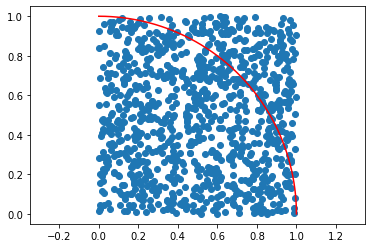

In [74]:
plt.scatter(xy[:,0], xy[:,1])
an = np.linspace(0, 0.5*np.pi, 50)
plt.plot(np.cos(an), np.sin(an), color='red')
plt.axis('equal')

plt.show()

In [75]:
ratio = sum(is_in_circle) / n_sample
ratio*4, ratio*4 - np.pi

(3.096, -0.04559265358979303)

In [76]:
def computePiMC_Ver1(n_points=1000, m_repeat=100):
    vals = np.zeros(m_repeat)
    for k in range(0, m_repeat):
        xy = np.random.rand(n_points, 2)
        is_in_circle = (xy[:,0]**2 + xy[:,1]**2 < 1)
        vals[k] = sum(is_in_circle) / n_points * 4.0
    
    return( [np.mean(vals), np.std(vals)] )

In [77]:
np.random.seed(1234567)
print( computePiMC_Ver1() )
print( computePiMC_Ver1(n_points=2000) )
print( computePiMC_Ver1(n_points=4000) )

[3.1438800000000002, 0.056671559004495387]
[3.1457999999999995, 0.0347131099154196]
[3.14487, 0.027787642937104222]


In [78]:
# antithetic method
def computePiMC_Ver2(n_points=1000, m_repeat=100):
    vals = np.zeros(m_repeat)
    for k in range(0, m_repeat):
        xy = np.random.rand(n_points//2, 2)
        xy = np.vstack((xy, 1-xy))
        is_in_circle = (xy[:,0]**2 + xy[:,1]**2 < 1)
        vals[k] = sum(is_in_circle) / n_points * 4.0
    
    return( [np.mean(vals), np.std(vals)] )

In [79]:
np.random.seed(1234567)
print( computePiMC_Ver2() )
print( computePiMC_Ver2(n_points=2000) )
print( computePiMC_Ver2(n_points=4000) )

[3.1467200000000006, 0.03861141800037914]
[3.1400599999999996, 0.030287231633148677]
[3.14218, 0.020381059835052735]


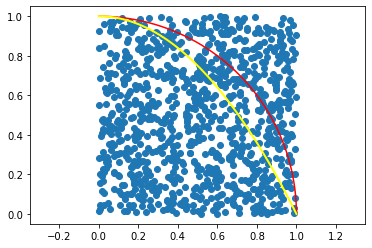

In [80]:
# Computing PI with Monte-Carlo 
plt.scatter(xy[:,0], xy[:,1])
an = np.linspace(0, 1, 50)
plt.plot(np.cos(0.5*np.pi*an), np.sin(0.5*np.pi*an), color='red')
plt.plot(an, 1-an**2, color='yellow', lw=2)
plt.axis('equal')
plt.show()

In [81]:
def computePiMC_Ver3(n_points=1000, m_repeat=100):
    vals = np.zeros(m_repeat)
    for k in range(0,m_repeat):
        xy = np.random.rand(n_points, 2)
        is_in_circle = (xy[:,0]**2 + xy[:,1]**2 < 1)
        is_in_parabola = (xy[:,1] + xy[:,0]**2 < 1)

        error_control = sum(is_in_parabola) / n_points - 2/3
        vals[k] = ( sum(is_in_circle) / n_points - error_control ) * 4.0 
    
    return( [np.mean(vals), np.std(vals)] )

In [82]:
# We get slighter better result (i.e., smaller std)
print( computePiMC_Ver3() )
print( computePiMC_Ver3(n_points=2000) )
print( computePiMC_Ver3(n_points=4000) )

[3.1424266666666667, 0.04207353562514089]
[3.142986666666667, 0.028728689493257426]
[3.145036666666666, 0.02339771570046955]


## Random number generation (How to repeat the same RNs)

In [83]:
state = np.random.get_state()
#state

In [84]:
np.random.set_state(state)
#np.random.seed(1234567)

In [85]:
np.random.rand(10)

array([0.23672004, 0.25399825, 0.61438704, 0.73815621, 0.74552974,
       0.7446005 , 0.37960404, 0.24990307, 0.17995735, 0.39543405])